In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
# Step 1: Read the CSV file (leaving the path empty for now)
file_path = "../dataset/data.csv"  # Update this path to the actual location of your CSV file
data = pd.read_csv(file_path)

data['Date']= pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [15]:
# Step 2: Drop the 'IsHoliday' column and define independent (X) and dependent (y) variables
X = data.drop(columns=['Weekly_Sales', 'IsHoliday'])
y = data['Weekly_Sales']


In [16]:
# Step 3: Train/test split and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))


mae = mean_absolute_error(y_test, y_pred)


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In ra các chỉ số
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 16333.45
MAE: 12086.55
MAPE: 47537.69%


In [18]:
# Step 4: Get coefficients and associate them with column names
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient',ascending=False)


# Print the coefficients for each independent variable
print(coef_df)

        Variable  Coefficient
1           Dept    45.878195
3    Temperature    30.050182
2           Size     0.063135
9      MarkDown5     0.058743
7      MarkDown3     0.042651
6      MarkDown2     0.012625
8      MarkDown4     0.007642
5      MarkDown1    -0.002376
10           CPI   -19.763142
0          Store   -43.462352
11  Unemployment  -100.478680
4     Fuel_Price  -504.590399


In [19]:
print(X.columns)

Index(['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')


In [20]:
# Step 4: Predict sales for Store 1 and Dept 1
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]

# Prepare data for prediction (drop 'Weekly_Sales' and other irrelevant columns)
X_store_dept = store_1_dept_1.drop(columns=['Weekly_Sales', 'IsHoliday'])

In [21]:
# Predict sales for Store 1 and Dept 1
store_dept_sales_pred = model.predict(X_store_dept)

# Actual sales for Store 1 and Dept 1
store_dept_sales_actual = store_1_dept_1['Weekly_Sales']

In [22]:
import matplotlib.pyplot as plt

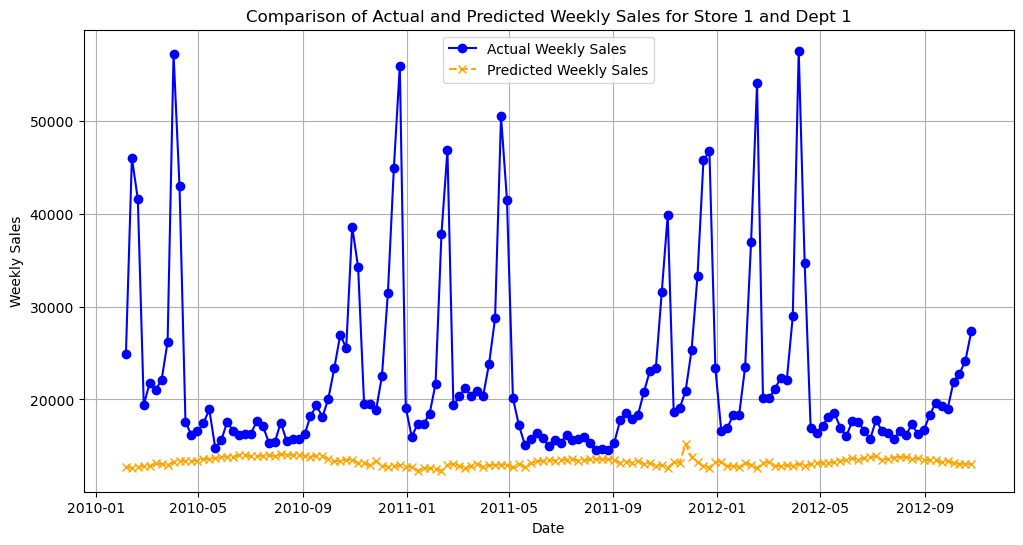

In [23]:
# Step 5: Plot actual vs predicted sales for Store 1 and Dept 1
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual and Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()